In [33]:
#notebook working with L galaxies SAM
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
filePath = '/Users/ari/Data/TNG/TNG100-1/postprocessing/LGalaxies_099.hdf5'
base_path = '/Users/ari/Data/TNG/TNG100-1/'
snapshot = 99
filePath2 = base_path+'postprocessing/LGalaxies_{:03d}.hdf5'.format(snapshot)
print(filePath2)

/Users/ari/Data/TNG/TNG100-1/postprocessing/LGalaxies_099.hdf5


In [20]:
with h5py.File(filePath,'r') as f:
    print(f['Galaxy'].keys())

<KeysViewHDF5 ['Galaxy', 'Header']>
<HDF5 group "/Header" (0 members)>
<KeysViewHDF5 ['BlackHoleMass', 'BulgeSize', 'Central_M_Crit200', 'Central_R_Crit200', 'ColdGasMass', 'ColdGasSpin', 'CoolingRadius', 'CoolingRate', 'CoolingRate_beforeAGN', 'CosInclination', 'DisruptOn', 'DistanceToCentralGal', 'EjectedMass', 'GasDiskRadius', 'HaloStellarMass', 'HotGasMass', 'HotGasRadius', 'InfallHotGasMass', 'InfallSnap', 'InfallVmax', 'InfallVmaxPeak', 'M_Crit200', 'Mag', 'MagBulge', 'MagDust', 'MassWeightAge', 'MergeOn', 'MergeTime', 'MetalsBulgeMass', 'MetalsColdGasMass', 'MetalsDiskMass', 'MetalsEjectedMass', 'MetalsHaloStellarMass', 'MetalsHotGasMass', 'MetalsStellarMass', 'OriMergeTime', 'Pos', 'PrimordialAccretionRate', 'QuasarAccretionRate', 'R_Crit200', 'RadioAccretionRate', 'StarFormationRate', 'StarFormationRateBulge', 'StellarBulgeMass', 'StellarDiskMass', 'StellarDiskRadius', 'StellarDiskSpin', 'StellarMass', 'SubhaloIndex_TNG', 'SubhaloIndex_TNG-Dark', 'SuhaloLen', 'Type', 'Vel', 'V

In [76]:
df = pd.DataFrame()
with h5py.File(filePath,'r') as f:
    for field in f['Galaxy'].keys():
        tmp = f['Galaxy/'+field][()]
        if tmp.ndim > 1:
            if tmp.shape[1]==3: #if 20 a magnitude, skip for now
                df[field+'X'] = tmp[:,0]
                df[field+'Y'] = tmp[:,1]
                df[field+'Z'] = tmp[:,2]
        else:
            df[field] = tmp
                       

In [77]:
print(df.shape)
df.keys()

(6047647, 63)


Index(['BlackHoleMass', 'BulgeSize', 'Central_M_Crit200', 'Central_R_Crit200',
       'ColdGasMass', 'ColdGasSpinX', 'ColdGasSpinY', 'ColdGasSpinZ',
       'CoolingRadius', 'CoolingRate', 'CoolingRate_beforeAGN',
       'CosInclination', 'DisruptOn', 'DistanceToCentralGalX',
       'DistanceToCentralGalY', 'DistanceToCentralGalZ', 'EjectedMass',
       'GasDiskRadius', 'HaloStellarMass', 'HotGasMass', 'HotGasRadius',
       'InfallHotGasMass', 'InfallSnap', 'InfallVmax', 'InfallVmaxPeak',
       'M_Crit200', 'MassWeightAge', 'MergeOn', 'MergeTime', 'MetalsBulgeMass',
       'MetalsColdGasMass', 'MetalsDiskMass', 'MetalsEjectedMass',
       'MetalsHaloStellarMass', 'MetalsHotGasMass', 'MetalsStellarMass',
       'OriMergeTime', 'PosX', 'PosY', 'PosZ', 'PrimordialAccretionRate',
       'QuasarAccretionRate', 'R_Crit200', 'RadioAccretionRate',
       'StarFormationRate', 'StarFormationRateBulge', 'StellarBulgeMass',
       'StellarDiskMass', 'StellarDiskRadius', 'StellarDiskSpinX',
      

In [78]:
mass_fields = ['BlackHoleMass', 'Central_M_Crit200', 'ColdGasMass', 'EjectedMass', 'HaloStellarMass',
               'HotGasMass', 'StellarMass', 'StellarDiskMass','StellarBulgeMass','MetalsBulgeMass',
               'MetalsColdGasMass', 'MetalsDiskMass', 'MetalsEjectedMass', 'MetalsHaloStellarMass', 
               'MetalsHotGasMass', 'MetalsStellarMass', 'M_Crit200'] 
size_fields = ['BulgeSize','GasDiskRadius','HotGasRadius','Central_R_Crit200', 'CoolingRadius','R_Crit200']
spin_fields = []  
hubble_value = 0.74
a=1.0
for f in list(df):
    if f in mass_fields:
        df[f] = df[f]*1.e10/hubble_value
    if f in size_fields:
        df[f] = df[f]/hubble_value*a #comoving multiply by expansion factor
        


/var/folders/fj/q1982v3n2zn210pjssk3yyjw0000gq/T/ipykernel_1546/1932421826.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.stairs(np.log10(counts),bins)
/var/folders/fj/q1982v3n2zn210pjssk3yyjw0000gq/T/ipykernel_1546/1932421826.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.stairs(np.log10(counts),bins)
/var/folders/fj/q1982v3n2zn210pjssk3yyjw0000gq/T/ipykernel_1546/1932421826.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.stairs(np.log10(counts),bins)


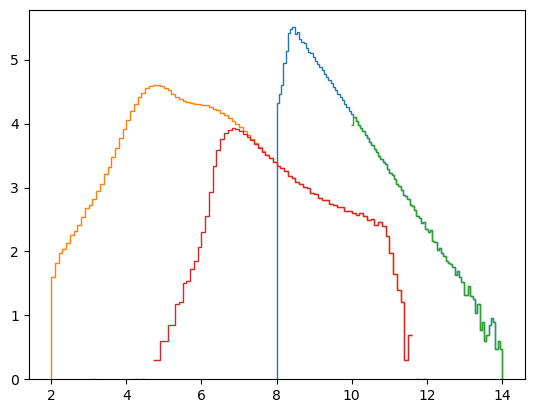

In [95]:
counts,bins = np.histogram(np.log10(df['Central_M_Crit200'][df['Type']==0]),bins=100,range=[8,14])
plt.stairs(np.log10(counts),bins)
counts,bins = np.histogram(np.log10(df['StellarMass'][df['Type']==0]),bins=100,range=[2,12])
plt.stairs(np.log10(counts),bins)
cut10 = np.logical_and(df['Type']==0,df['Central_M_Crit200'] > 1.e10)
counts,bins = np.histogram(np.log10(df['Central_M_Crit200'][cut10]),bins=100,range=[8,14])
plt.stairs(np.log10(counts),bins)
counts,bins = np.histogram(np.log10(df['StellarMass'][cut10]),bins=100,range=[2,12])
plt.stairs(np.log10(counts),bins)

In [67]:
df = df[df['StellarMass'] > 1.e9]
df.shape

(16268, 63)

In [75]:
print((df['Type']==2).sum())

991


In [96]:
df_dmo = pd.read_hdf('tng-dmo.h5')

In [98]:
(df_dmo['SubhaloParent']>0).sum()

1769

In [104]:
df_j = df.join(df_dmo,on='SubhaloIndex_TNG-Dark',rsuffix = '_dmo') 

In [105]:
df_j.keys()

Index(['BlackHoleMass', 'BulgeSize', 'Central_M_Crit200', 'Central_R_Crit200',
       'ColdGasMass', 'ColdGasSpinX', 'ColdGasSpinY', 'ColdGasSpinZ',
       'CoolingRadius', 'CoolingRate', 'CoolingRate_beforeAGN',
       'CosInclination', 'DisruptOn', 'DistanceToCentralGalX',
       'DistanceToCentralGalY', 'DistanceToCentralGalZ', 'EjectedMass',
       'GasDiskRadius', 'HaloStellarMass', 'HotGasMass', 'HotGasRadius',
       'InfallHotGasMass', 'InfallSnap', 'InfallVmax', 'InfallVmaxPeak',
       'M_Crit200', 'MassWeightAge', 'MergeOn', 'MergeTime', 'MetalsBulgeMass',
       'MetalsColdGasMass', 'MetalsDiskMass', 'MetalsEjectedMass',
       'MetalsHaloStellarMass', 'MetalsHotGasMass', 'MetalsStellarMass',
       'OriMergeTime', 'PosX', 'PosY', 'PosZ', 'PrimordialAccretionRate',
       'QuasarAccretionRate', 'R_Crit200', 'RadioAccretionRate',
       'StarFormationRate', 'StarFormationRateBulge', 'StellarBulgeMass',
       'StellarDiskMass', 'StellarDiskRadius', 'StellarDiskSpinX',
      

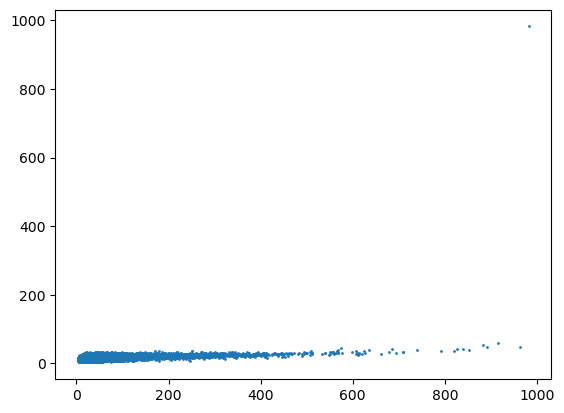

In [112]:
cent = df_j['Type']==0
plt.scatter(df_j['Vmax'][cent],df_j['SubhaloVmax'][cent],s=1)

In [113]:
import illustris_python as ilsim

In [117]:
basePath = '/Users/ari/Data/TNG/TNG100-1-Dark/output'
subs = ilsim.groupcat.loadSubhalos(basePath, 99)

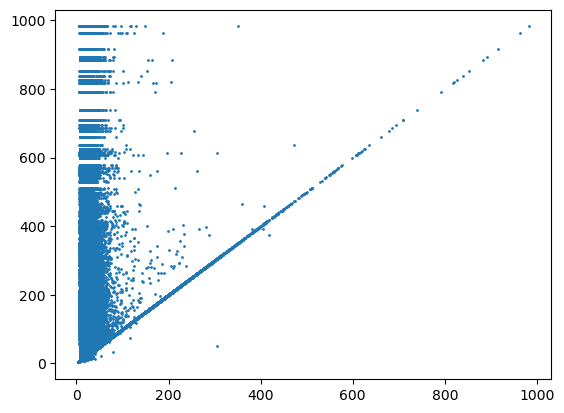

In [121]:
cent = df['Type']==0
plt.scatter(df['Vmax'],subs['SubhaloVmax'][df['SubhaloIndex_TNG-Dark']],s=1)

In [134]:
f = 'SubhaloPos'
subs[f].ndim

2

In [136]:
tmp = subs[f][df['SubhaloIndex_TNG-Dark'],0]
tmp.shape

(6047647,)